In [7]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from collections import defaultdict
import yaml
from tqdm import tqdm

DATA_PATH = Path("..") / "datasets" / "pmlb" / "processed"


In [9]:
datasets = defaultdict(dict)

for type_dir in DATA_PATH.iterdir():
    if not type_dir.is_dir():
        continue

    for ds_dir in tqdm(list(type_dir.iterdir()), desc=type_dir.name):
        if not ds_dir.is_dir():
            continue

        datasets[type_dir.name][ds_dir.name] = yaml.safe_load(
            (ds_dir / "metadata.yaml").read_text()
        )
datasets = dict(datasets)


reg: 100%|██████████| 244/244 [00:05<00:00, 45.48it/s]


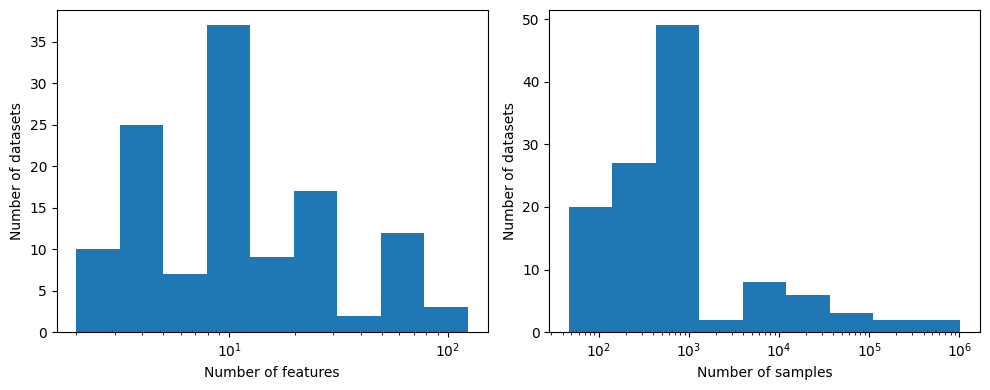

In [19]:
def logspace_hist(ax, vals, bins):
    min_vals = min(vals)
    max_vals = max(vals)
    bins = np.logspace(
        np.log10(min_vals),
        np.log10(max_vals),
        num=n_bins,
        endpoint=True,
    )
    ax.hist(vals, bins=bins)

    return ax


n_features = [v["n_features"] for v in datasets["reg"].values()]
n_total = [v["n_total"] for v in datasets["reg"].values()]

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
n_bins = 10

logspace_hist(axs[0], n_features, n_bins)
axs[0].set_xlabel("Number of features")
axs[0].set_ylabel("Number of datasets")

logspace_hist(axs[1], n_total, n_bins)
axs[1].set_xlabel("Number of samples")
axs[1].set_ylabel("Number of datasets")

for ax in axs:
    ax.set_xscale("log")

plt.tight_layout()
plt.show()
